# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [16]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    return (-1.5*f(x) + 2*f(x+h) - 0.5*f(x+2*h))/h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [17]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


С уменьшением шага на один порядок ошибка уменьшается на два порядка. Схема действительно порядка $O(h^2)$. 

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [18]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [19]:
def deriv_1(f, x, h): #two-point
    return (f(x+h) - f(x))/h

In [20]:
x = 1

h = [10.**i for i in range(-2, -17, -1)]

print('Two-point one-sided derivative:')
for i in h:
    print("%5.10f -- %7.4g" % (deriv_1(f,x,i), i))
    
print('\nHandmade one-sided derivative:')
for i in h:
    print("%5.10f -- %7.4g" % (deriv(f,x,i), i))

Two-point one-sided derivative:
1.0150332503 --    0.01
1.0015003332 --   0.001
1.0001500033 --  0.0001
1.0000150000 --   1e-05
1.0000014999 --   1e-06
1.0000001506 --   1e-07
1.0000000089 --   1e-08
1.0000000842 --   1e-09
1.0000000829 --   1e-10
1.0000000828 --   1e-11
1.0000889006 --   1e-12
0.9992007222 --   1e-13
0.9992007222 --   1e-14
1.1102230246 --   1e-15
0.0000000000 --   1e-16

Handmade one-sided derivative:
0.9999338287 --    0.01
0.9999993338 --   0.001
0.9999999933 --  0.0001
1.0000000000 --   1e-05
0.9999999998 --   1e-06
1.0000000017 --   1e-07
0.9999999828 --   1e-08
1.0000001938 --   1e-09
1.0000000827 --   1e-10
1.0000000827 --   1e-11
1.0001999229 --   1e-12
0.9980904991 --   1e-13
0.9992007222 --   1e-14
1.2212453271 --   1e-15
-1.1102230246 --   1e-16


<IPython.core.display.Javascript object>


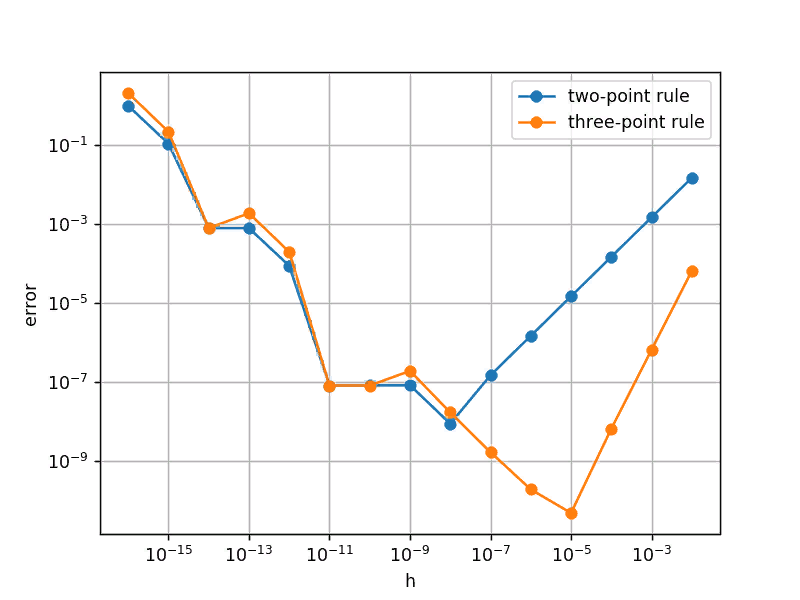

In [31]:
err_1 = [abs(deriv_1(f, x, i)-1.) for i in h]
err_2 = [abs(deriv(f, x, i)-1.) for i in h]

import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure()
plt.plot(h, err_1, '-o', label='two-point rule')
plt.plot(h, err_2, '-o', label='three-point rule')
plt.xlabel('h')
plt.ylabel('error')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()

In [22]:
#Поиск оптимальных h

h1 = 0.01
for i in range(14):
    if err_1[i]<err_1[i+1]:
        h1 = h[i]
        break
        
h2 = 0.01
for i in range(14):
    if err_2[i]<err_2[i+1]:
        h2 = h[i]
        break
        
print('The optimal h for: \n', '1) one-point rule:', h1, '\n 2) two-point rule:', h2)

The optimal h for: 
 1) one-point rule: 1e-08 
 2) two-point rule: 1e-05


Сравним с теоретическими оценками. Для схемы с ошибкой порядка $O(h^d)$: 

$$ 
h_{opt} = \epsilon_{f} ^{\frac 1{(d+1)}} max(1,x),
$$

Таким образом, для схемы порядка $d=1$: $h_{opt} = 10 ^{-8}$; для схемы порядка $d=2$: $h_{opt} = 5 \cdot 10 ^{-6}$, что совпадает с полученными результатами.

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [57]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


В точке 0 ошибка схемы порядка $O(h)$. Это связано с обнулением первой производной данной функции в нуле, из-за чего порядок схемы понизился.

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [2]:
import numpy as np

In [4]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    I = float('inf')
    i = 0
    N = 2
    
    while i == 0:
        
        hk = (b-a)/N
        xk = np.linspace(a + hk/2, b - hk/2, N) #берем середины интервалов
        Qk = [func(k) for k in xk]
        Q = np.sum(Qk)*hk
        
        if (abs(I-Q)<eps):
            break
            
        N *= 2
        I = Q
        
    return Q, N

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


Посчитаем численно интеграл $ \int_0^\pi\! \sin{x}\, dx$ и исследуем количество интервалов для заданной ошибки:

In [95]:
func = lambda x: np.sin(x)

result, n = midpoint_rule(func, 0, np.pi, 1e-03)
print('result: %f -- with N = %g' %(result, n))

result: 2.000201 -- with N = 64


Реальное значение равняется 2, так что всё работает.

Теоретически модуль ошибки ограничен сверху значением $R^{(N)}=\frac 1{24} max|f''|(b-a)h^2=\frac 1{24} max|f''|\frac{(b-a)^3}{N^2}$, где максимум модуля второй производной подынтегральной функции берется на интервале интегрирования.

<IPython.core.display.Javascript object>


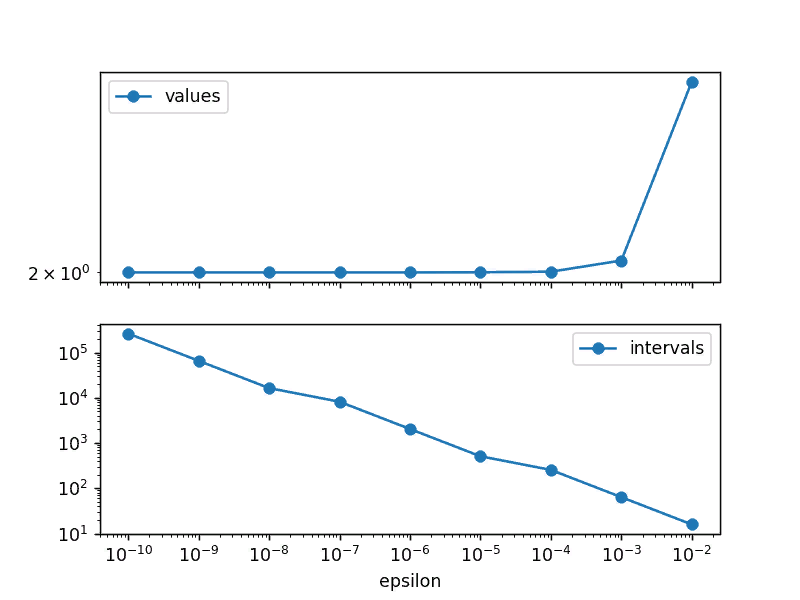

<IPython.core.display.Javascript object>


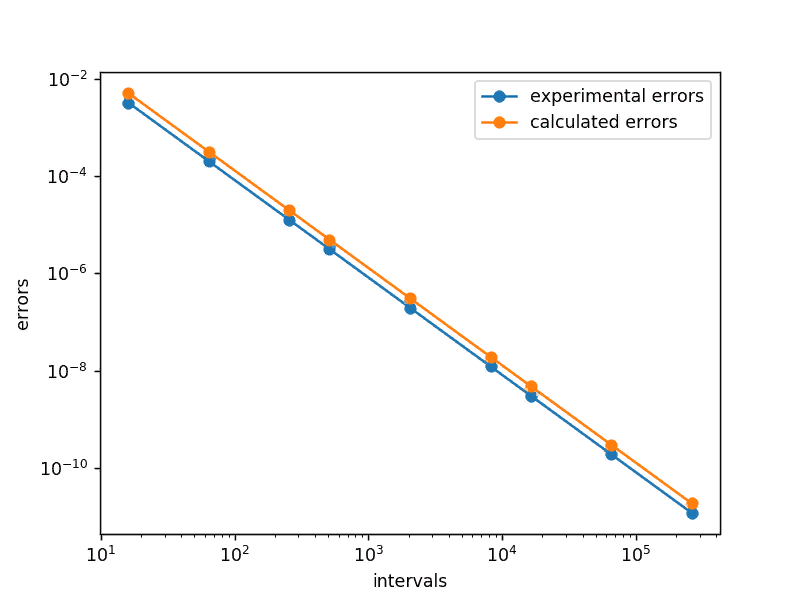

In [96]:
eps = [10**p for p in range(-2, -11, -1)]

values = []
errors = []
exp_er =[]
n_int = []


for e in eps:
    
    I, N = midpoint_rule(func, 0, np.pi, e)
    
    values.append(I)
    errors.append(abs(I-2))
    exp_er.append(np.pi**3/N**2/24)
    n_int.append(N)
    
fig, (ax1, ax2) = plt.subplots(2, 1, sharex="col")

ax1.plot(eps, values, '-o', label='values')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()

ax2.plot(eps, n_int, '-o', label='intervals')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('epsilon')
ax2.legend()

plt.figure()
plt.plot(n_int, errors, '-o', label='experimental errors')
plt.plot(n_int, exp_er, '-o', label='calculated errors')
plt.xlabel('intervals')
plt.ylabel('errors')
plt.xscale('log')
plt.yscale('log')
plt.legend()

Из графика видим, что ошибка действительно зависит от количества интервалов как $\frac 1{N^2}$.

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [65]:
func = lambda x: np.sin(np.sqrt(x))/x

1. Наивно скормим интеграл методу:

In [91]:
I, n = midpoint_rule(func, 0, 1, 1e-04)
print('The integral equals %1.4f with the number of iterations %g' %(I, np.log2(n)))

The integral equals 1.8920 with the number of iterations 23


2. Вычтем сингулярность и скормим методу:

In [71]:
sing_func = lambda x: 1/np.sqrt(x) #интеграл этой функции известен и равен 2
good_func = lambda x: func(x) - sing_func(x)

In [88]:
I, n = midpoint_rule(good_func, 0, 1, 1e-04)
print('The integral equals %1.4f with the number of iterations %g' %(I+2, np.log2(n)))

The integral equals 1.8921 with the number of iterations 5


Как видим, второй вариант намного быстрее сошёлся.

3. Скормим методу и `sing_func` тоже:

In [93]:
I1, n1 = midpoint_rule(good_func, 0, 1, 1e-04)
I2, n2 = midpoint_rule(sing_func, 0, 1, 1e-04)
print('The integral equals %1.4f with the number of iterations %g' %(I1+I2, np.log2(n1*n2)))

The integral equals 1.8919 with the number of iterations 28


Плохая идея, всё сошлось ещё хуже наивного метода. Что ж, интеграл от вычитаемой функции лучше знать.